<span style="font-size:35px; color:black"><b>Water Quality</b></span>

This project analyzes Total Coliform Rule (TCR) violations across five U.S. states—Nebraska, New York, Massachusetts, Georgia, and Illinois—to identify trends and patterns. It focuses on comparing violation rates between small and large water systems using SDWIS data.

In [1]:
# Import Packages Needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

<span style="font-size:20px; color:black"><b>Importing Data</b></span>

Here we import a CSV dataset into Jupyter Notebook to efficiently analyze, clean, and manipulate data using Python libraries like pandas. This also will allow  to easily create visualizations and automate repetitive tasks. Jupyter will combine code, notes, and results in one place, making the analysis clear and reproducible.


In [ ]:
# Define the file paths for all five CSVs
state_files = {
    'GA': 'ViolationReport_GA.csv',
    'IL': 'ViolationReport_IL.csv',
    'MA': 'ViolationReport_MA.csv',
    'NE': 'ViolationReport_NE.csv',
    'NY': 'ViolationReport_NY.csv'
}

# Read and label each CSV into a list of DataFrames
dataframes = []
for state, file in state_files.items():
    try:
        df = pd.read_csv(file, encoding='latin1')  # Adjust encoding if needed
        df['State'] = state  # Add a 'State' column to identify the state
        dataframes.append(df)
        print(f"Successfully loaded {state} data.")
    except FileNotFoundError:
        print(f"File for {state} not found. Please ensure the file '{file}' is in the correct directory.")

# Concatenate all DataFrames into a single DataFrame
if dataframes:
    combined_data = pd.concat(dataframes, ignore_index=True)
    # Display the first few rows of the combined data
    combined_data.head()  # This will display the top rows of the combined dataset
else:
    print("No data was loaded due to missing files.")

Successfully loaded GA data.
Successfully loaded IL data.
Successfully loaded MA data.
Successfully loaded NE data.
Successfully loaded NY data.


<span style="font-size:20px; color:black"><b>Data Preprocessing</b></span>

Data preprocessing will involve cleaning the dataset by handling missing values and ensuring correct data types. It will also includes categorizing data, such as grouping water systems into "small" or "large." These steps are essential to prepare the data for accurate analysis and visualization.


In [ ]:
# Load data (adjust path if needed)
il_df = pd.read_csv("ViolationReport_IL.csv", encoding="latin1")
ny_df = pd.read_csv("ViolationReport_NY.csv", encoding="latin1")
ga_df = pd.read_csv("ViolationReport_GA.csv", encoding="latin1")
ma_df = pd.read_csv("ViolationReport_MA.csv", encoding="latin1")
ne_df = pd.read_csv("ViolationReport_NE.csv", encoding="latin1")

# Function to process TCR violations and classify by system size
def process_tcr_violations(df, state_name):
    # Filter for Total Coliform Rule violations
    tcr_df = df[df["Rule Name"].str.contains("Total Coliform Rule", case=False, na=False)].copy()

    # Clean and convert population to numeric
    tcr_df["Population Served Count"] = (
        tcr_df["Population Served Count"]
        .astype(str)
        .str.replace(",", "", regex=False)
        .str.extract("(\d+)", expand=False)
        .astype(float)
    )

    # Classify system size
    tcr_df["System Size"] = tcr_df["Population Served Count"].apply(
        lambda x: "Small (<10k)" if x < 10000 else "Large (≥10k)"
    )

    # Group and summarize
    summary = tcr_df.groupby("System Size").size().reset_index(name="TCR Violation Count")
    summary["State"] = state_name
    return summary

# Apply processing to both datasets
il_summary = process_tcr_violations(il_df, "Illinois")
ny_summary = process_tcr_violations(ny_df, "New York")
ne_summary = process_tcr_violations(ne_df, "Nebraska")
ga_summary = process_tcr_violations(ga_df, "Georgia")
ma_summary = process_tcr_violations(ma_df, "Massachussets")

# Combine results
summary_df = pd.concat([il_summary, ny_summary ,ma_summary ,ne_summary , ga_summary], ignore_index=True)

# Display result
print(summary_df)

# (Optional) Save summary to CSV
summary_df.to_csv("TCR_Violation_Summary_by_System_Size.csv", index=False)

    System Size  TCR Violation Count          State
0  Large (≥10k)                  660       Illinois
1  Small (<10k)                10254       Illinois
2  Large (≥10k)                  225       New York
3  Small (<10k)                29075       New York
4  Large (≥10k)                  990  Massachussets
5  Small (<10k)                 5811  Massachussets
6  Large (≥10k)                   68       Nebraska
7  Small (<10k)                 7622       Nebraska
8  Large (≥10k)                  375        Georgia
9  Small (<10k)                11538        Georgia


<span style="font-size:20px; color:black"><b>Time Series Analysis</b></span>

I will summarize my data in Jupyter Notebook to clearly identify trends and patterns in TCR violations across the five selected states. Summarizing helps me break down large SDWIS datasets into manageable insights, such as violation rates over time and by system size. This is essential for comparing small vs. large systems and preparing summary tables or figures that support the project's goal of analyzing regional and system-level differences in compliance.

/tmp/ipykernel_151/1120740045.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Compliance Period Begin Date'], errors='coerce')
/tmp/ipykernel_151/1120740045.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Compliance Period Begin Date'], errors='coerce')
/tmp/ipykernel_151/1120740045.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Compliance Period Begin Date'], errors='coerce')
/tmp/ipykernel_151/1120740045.py:30: UserWarning: Could not infer format, so each elemen

,State,System Size,TCR Violation Count
0,GA,Large (>3300),1019
1,GA,Small (≤3300),10894
2,IL,Large (>3300),1368
3,IL,Small (≤3300),9546
4,MA,Large (>3300),1624
5,MA,Small (≤3300),5177
6,NY,Large (>3300),450
7,NY,Small (≤3300),28850


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


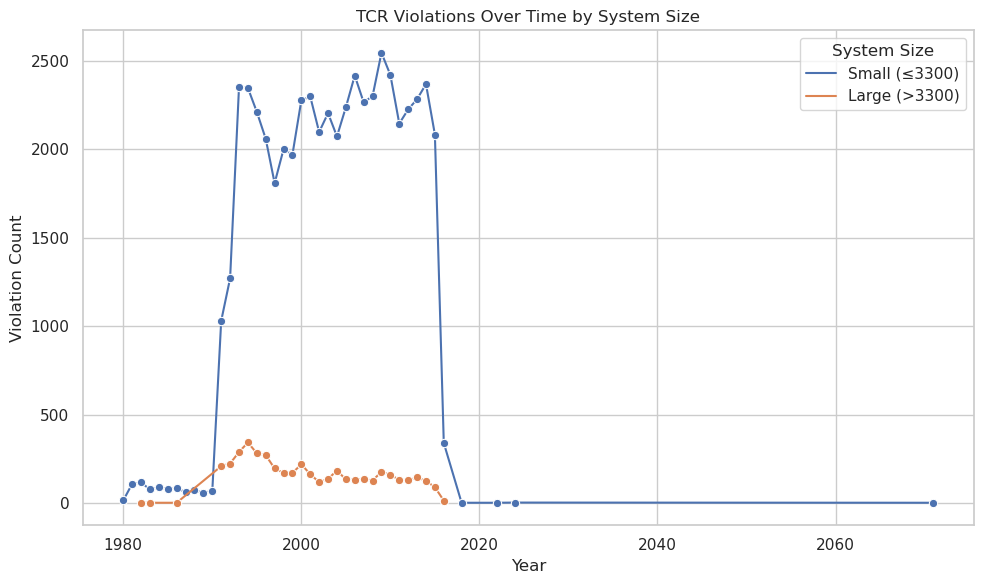

In [ ]:
# Optional: Configure plotting style
sns.set(style="whitegrid")

# Load & preprocess function
def preprocess_violations(filepath, state, population_threshold=3300):
    df = pd.read_csv(filepath, encoding='ISO-8859-1')
    df.columns = df.columns.str.strip()
    df['State'] = state

    # Clean population field
    df['Population Served Count'] = (
        df['Population Served Count']
        .astype(str).str.replace(",", "").str.extract(r'(\d+)', expand=False)
        .astype(float)
    )

    # Filter TCR violations
    df = df[df['Rule Name'].str.contains("Total Coliform Rule", case=False, na=False)]

    # Drop missing essentials
    df = df.dropna(subset=['Population Served Count', 'Violation ID'])

    # System size
    df['System Size'] = df['Population Served Count'].apply(
        lambda x: 'Small (≤3300)' if x <= population_threshold else 'Large (>3300)'
    )

    # Parse date
    if 'Compliance Period Begin Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Compliance Period Begin Date'], errors='coerce')
        df['Year'] = df['Date'].dt.year
    else:
        df['Year'] = pd.NaT

    return df

# Load all 5 states
states = {
    "IL": "ViolationReport_IL.csv",
    "NY": "ViolationReport_NY.csv",
    "MA": "ViolationReport_MA.csv",
    "GA": "ViolationReport_GA.csv",
    "MA": "ViolationReport_MA.csv",
    # Add 3 more like: "TX": "ViolationReport_TX.csv"
}

# Combine all into one DataFrame
dfs = [preprocess_violations(path, state) for state, path in states.items()]
all_data = pd.concat(dfs, ignore_index=True)

#  Summary Tables 

# Violations by system size and state
summary_size = all_data.groupby(['State', 'System Size']).size().reset_index(name='TCR Violation Count')
display(summary_size)

# Violations over time (optional)
summary_year = all_data.dropna(subset=['Year']).groupby(['Year', 'System Size']).size().reset_index(name='Count')

#  Plot Example 
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_year, x='Year', y='Count', hue='System Size', marker='o')
plt.title("TCR Violations Over Time by System Size")
plt.ylabel("Violation Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

<span style="font-size:20px; color:black"><b>Comparing Violation Rates by System Sizes</b></span>

Comparing violation rates by system sizes will involve analyzing the frequency of Total Coliform Rule (TCR) violations for both small and large water systems. This comparison will help identify if there are significant differences in the violation rates between the two groups. Visualizations like bar charts or box plots can be used to display the variation in violations across system sizes, helping to understand if larger systems tend to have lower or higher violation rates than smaller ones.

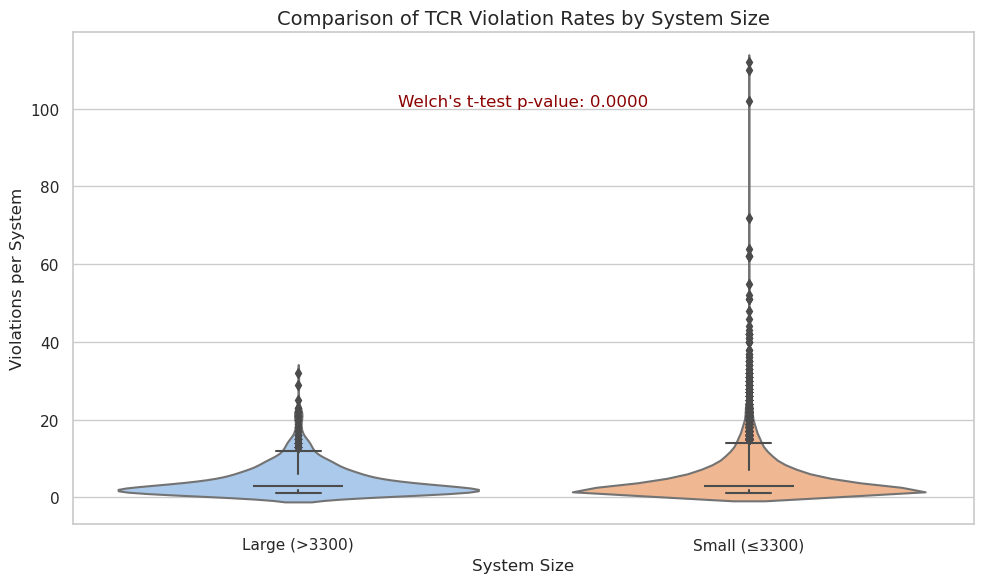

In [ ]:
# --- STEP 1: Aggregate violation rates by system ---
# Each row = one system with total violations
violation_summary = (
    all_data.groupby(['PWS ID', 'System Size', 'State'])
    .size()
    .reset_index(name='TCR Violation Count')
)

# --- STEP 2: Welch’s t-test (unequal variance) ---
small = violation_summary[violation_summary['System Size'] == 'Small (≤3300)']['TCR Violation Count']
large = violation_summary[violation_summary['System Size'] == 'Large (>3300)']['TCR Violation Count']
t_stat, p_val = ttest_ind(small, large, equal_var=False)

# --- STEP 3: Combined Violin + Box Plot ---
plt.figure(figsize=(10, 6))
sns.violinplot(data=violation_summary, x='System Size', y='TCR Violation Count', inner=None, palette='pastel')
sns.boxplot(data=violation_summary, x='System Size', y='TCR Violation Count', width=0.2, boxprops=dict(alpha=0.5))

# --- Annotate plot with t-test result ---
plt.title('Comparison of TCR Violation Rates by System Size', fontsize=14)
plt.xlabel('System Size')
plt.ylabel('Violations per System')
plt.text(
    0.5, max(small.max(), large.max()) * 0.9,
    f"Welch's t-test p-value: {p_val:.4f}",
    ha='center', fontsize=12, color='darkred'
)

plt.tight_layout()
plt.show()

<span style="font-size:20px; color:black"><b>Statistical Analysis</b></span>

In this statistical analysis section of the project, we compare Total Coliform Rule (TCR) violation rates between small and large water systems using hypothesis testing. Specifically, we apply a t-test to assess whether there are significant differences in violation rates between the two groups across states. This will assist in exploring the relationship between system size and violation rates, providing a deeper understanding of how system size impacts TCR compliance.

In [ ]:
from scipy.stats import ttest_ind

# Group by system and count violations per system
violation_counts = all_data.groupby(['PWS ID', 'System Size']) \
    .size().reset_index(name='TCR Violation Count')

# Separate into small and large system groups
small_group = violation_counts[violation_counts['System Size'] == 'Small (≤3300)']['TCR Violation Count']
large_group = violation_counts[violation_counts['System Size'] == 'Large (>3300)']['TCR Violation Count']

# Perform two-sample t-test (unequal variance)
t_stat, p_value = ttest_ind(small_group, large_group, equal_var=False, nan_policy='omit')

# Output the results
print("T-Test Results: Small vs. Large Systems")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Optional interpretation
if p_value < 0.05:
    print("The difference in TCR violation rates between small and large systems is statistically significant.")
else:
    print("No statistically significant difference in TCR violation rates between system sizes.")

T-Test Results: Small vs. Large Systems
T-statistic: 4.7663
P-value: 2.0779e-06
The difference in TCR violation rates between small and large systems is statistically significant.


<span style="font-size:20px; color:black"><b>Visualize Distribution of Violation Rates</b></span>

To visualize the distribution of TCR violation rates between small and large water systems, we can use a boxplot. This will show how violation rates are distributed, highlighting the median, quartiles, and potential outliers for each system size.

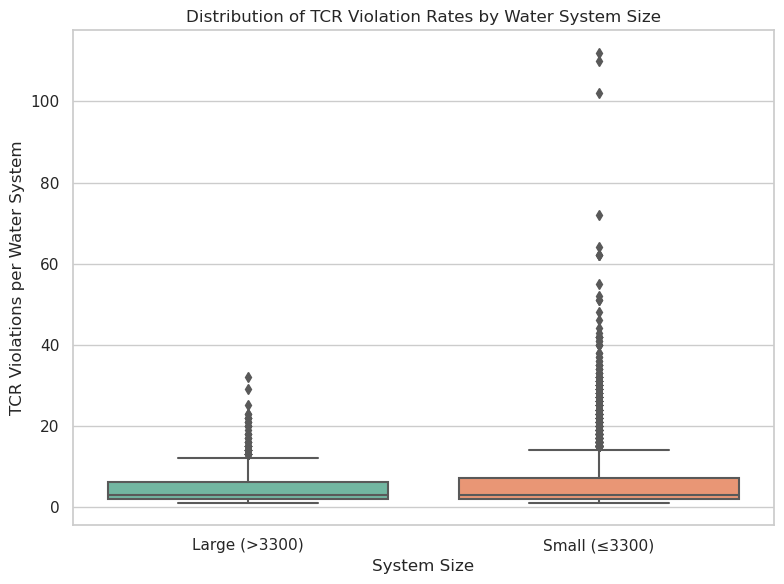

In [ ]:
# Group by system and count violations
violation_counts = all_data.groupby(['PWS ID', 'System Size']) \
    .size().reset_index(name='TCR Violation Count')

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=violation_counts, x='System Size', y='TCR Violation Count', palette='Set2')

# Annotate
plt.title("Distribution of TCR Violation Rates by Water System Size")
plt.xlabel("System Size")
plt.ylabel("TCR Violations per Water System")
plt.tight_layout()
plt.show()

<span style="font-size:20px; color:black"><b>States Level of Comparison Violations</b></span>

To compare TCR violation rates at the state level, we can visualize the average violation rates across all states for both small and large systems. A bar plot or heatmap can effectively display this comparison, allowing us to see if certain states have higher or lower violation rates.

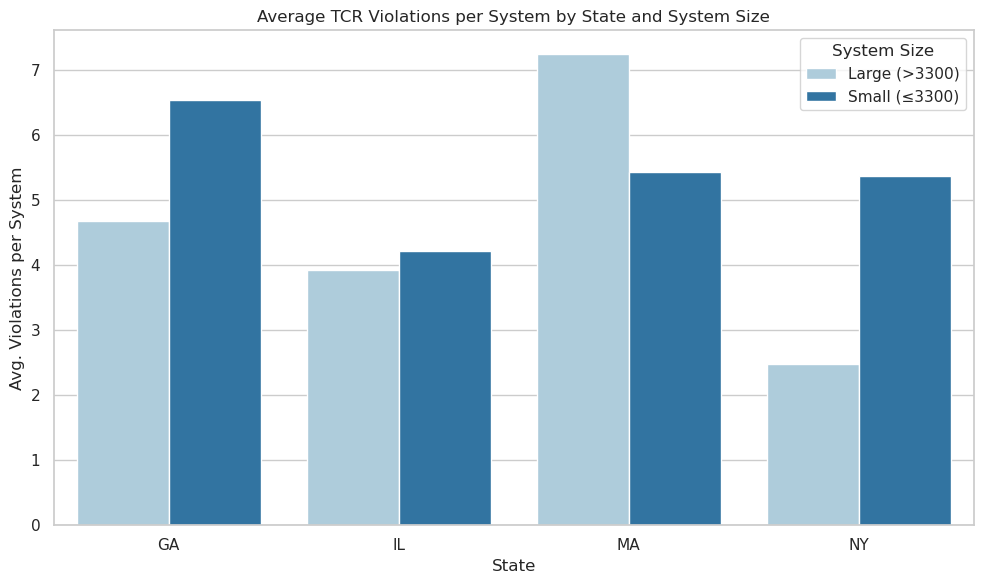

In [ ]:
# Group by state and system size to get mean violations per system
state_summary = (
    all_data.groupby(['PWS ID', 'State', 'System Size'])
    .size()
    .reset_index(name='TCR Violation Count')
    .groupby(['State', 'System Size'])['TCR Violation Count']
    .mean()
    .reset_index(name='Avg Violations per System')
)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=state_summary, x='State', y='Avg Violations per System', hue='System Size', palette='Paired')

# Annotate
plt.title("Average TCR Violations per System by State and System Size")
plt.ylabel("Avg. Violations per System")
plt.xlabel("State")
plt.tight_layout()
plt.show()

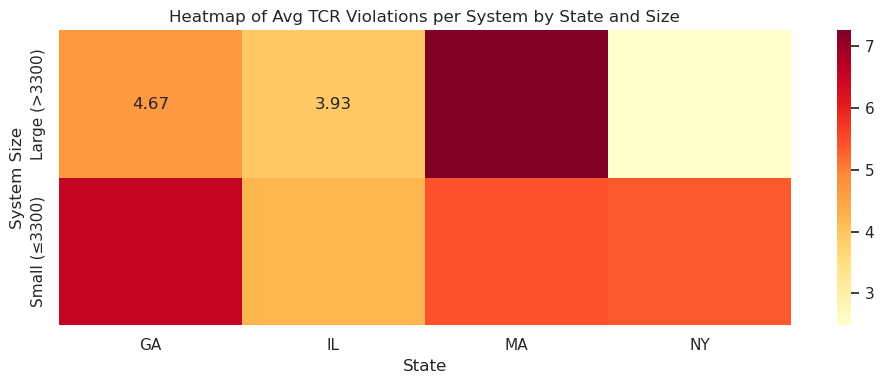

In [ ]:
# Pivot for heatmap format
heatmap_data = state_summary.pivot(index='System Size', columns='State', values='Avg Violations per System')

# Heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Heatmap of Avg TCR Violations per System by State and Size")
plt.ylabel("System Size")
plt.xlabel("State")
plt.tight_layout()
plt.show()


<span style="font-size:20px; color:black"><b>Conclusion and Final Report</b></span>

A conclusion illustrate clearly the key findings of the analysis and explain their significance. It helps connect the results back to the original project goals, ensuring that insights are easy to understand for readers. The conclusion also highlights patterns, trends, and implications, making the notebook more informative and complete. Additionally, it provides a foundation for recommendations or future research based on the data.

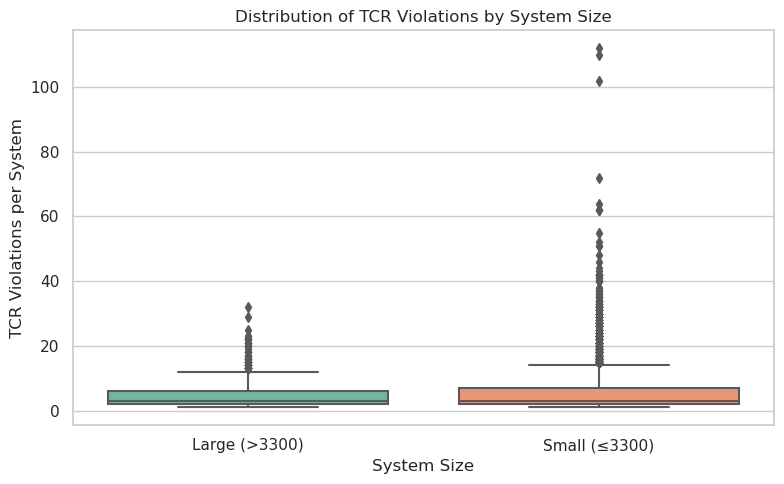

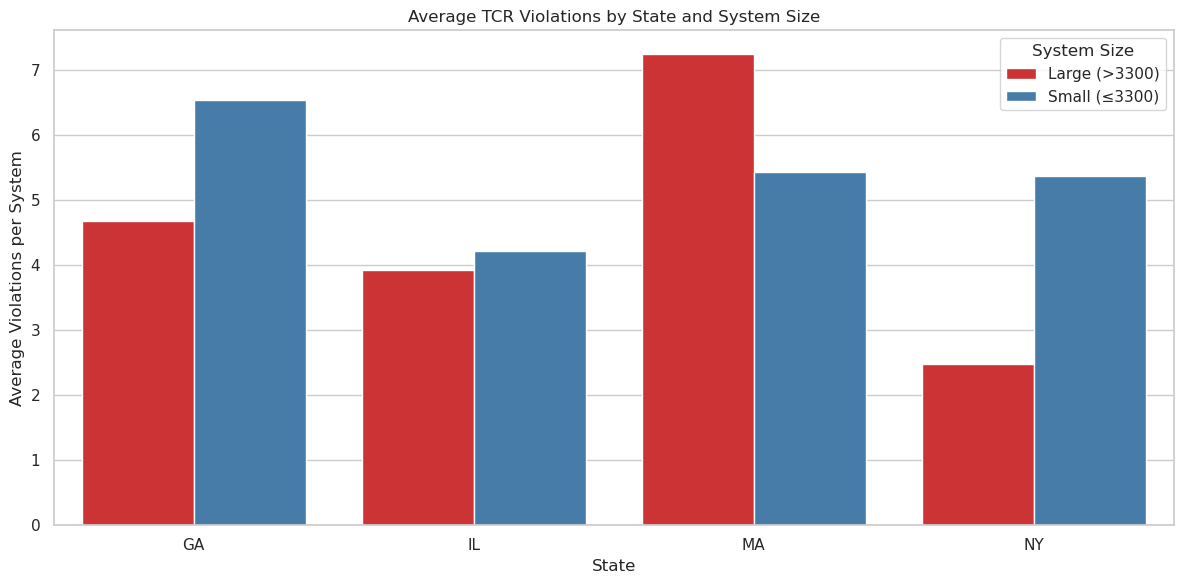

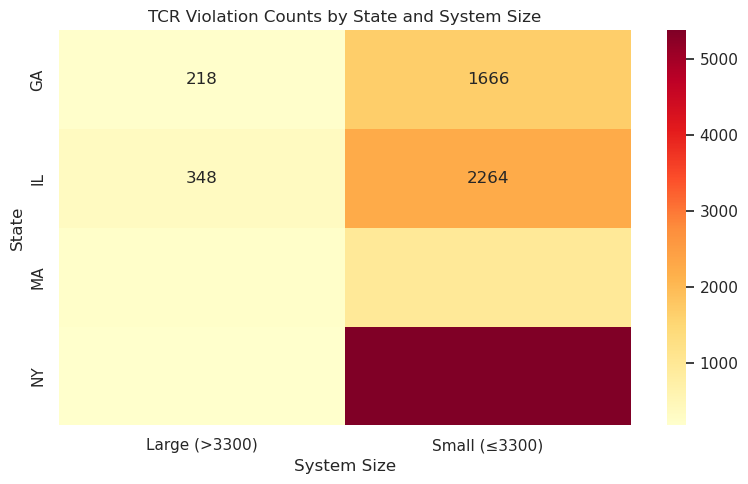

In [ ]:
# Group data for plotting
violation_counts = all_data.groupby(['PWS ID', 'System Size', 'State']).size().reset_index(name='TCR Violation Count')

# --- Box Plot: TCR Violation Distribution by System Size ---
plt.figure(figsize=(8, 5))
sns.boxplot(data=violation_counts, x='System Size', y='TCR Violation Count', palette='Set2')
plt.title('Distribution of TCR Violations by System Size')
plt.xlabel('System Size')
plt.ylabel('TCR Violations per System')
plt.tight_layout()
plt.show()

# --- Bar Plot: Average Violations per State by System Size ---
avg_state = violation_counts.groupby(['State', 'System Size'])['TCR Violation Count'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_state, x='State', y='TCR Violation Count', hue='System Size', palette='Set1')
plt.title('Average TCR Violations by State and System Size')
plt.ylabel('Average Violations per System')
plt.xlabel('State')
plt.legend(title='System Size')
plt.tight_layout()
plt.show()

# --- Heatmap: Violation Matrix by State and System Size ---
heatmap_data = violation_counts.groupby(['State', 'System Size']).size().unstack(fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd')
plt.title('TCR Violation Counts by State and System Size')
plt.ylabel('State')
plt.xlabel('System Size')
plt.tight_layout()
plt.show()